ORIGINAL DATA SOURCE:

The dataset contains 2 folders - Infected - Uninfected

And a total of 27,558 images.

Acknowledgements This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/

*This is too much data to fit in memory as a numpy array, so we'll need to feed it into our model in batches. *

In [65]:
import os


In [66]:
data_dir= 'D:\\Courses\\Udemy\\Image Data\\cell_images'

In [67]:
os.listdir(data_dir)

['test', 'train']

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
from matplotlib.image import imread

In [70]:
train_path= data_dir+ '\\train\\'
test_path= data_dir+ '\\test\\'

In [71]:
test_path

'D:\\Courses\\Udemy\\Image Data\\cell_images\\test\\'

In [72]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [73]:
#maleria dataset of 27000 images,that are seperated for infected(parasitized ) and uninfected cells 
#in test and train directories

In [74]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [1]:
#os.listdir(train_path+ 'parasitized')

In [78]:
para_cell= train_path+ 'parasitized\\'+ 'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [79]:
para_cells

'D:\\Courses\\Udemy\\Image Data\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [80]:
imread(para_cells)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [81]:
imread(para_cells).shape

(148, 142, 3)

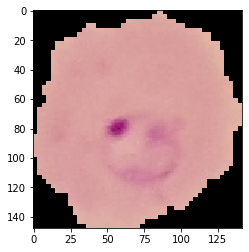

In [82]:
plt.imshow(imread(para_cells))

In [2]:
#os.listdir(train_path+ 'uninfected')

In [84]:
#reading uninfected cell

In [85]:
uninf_cell= train_path + 'uninfected\\'+ 'C100P61ThinF_IMG_20150918_144104_cell_128.png'


In [86]:
uninf_cell

'D:\\Courses\\Udemy\\Image Data\\cell_images\\train\\uninfected\\C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [87]:
imread(uninf_cell)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

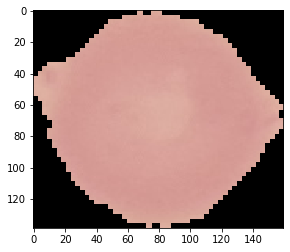

In [88]:
plt.imshow(imread(uninf_cell))

In [89]:
imread(uninf_cell).shape

(139, 160, 3)

In [90]:
len(os.listdir(train_path+ 'parasitized')) # no of images infected images in train directory

12480

In [91]:
len(os.listdir(train_path+ 'uninfected'))   # no of images uninfected images in train directory

12480

In [92]:
len(os.listdir(test_path+ 'parasitized')) # no of images infected images in test directory

1300

In [93]:
len(os.listdir(test_path+ 'uninfected')) # no of images uninfected images in test directory

1300

In [94]:
#getting dimensions of the images and select a suitable size for all images for the model

In [3]:
#os.listdir(test_path+ 'parasitized')


In [105]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+ 'parasitized'): 
    d1,d2,color= imread(test_path+ 'parasitized\\'+image_filename).shape
    
    dim1.append(d1)
    dim2.append(d2)

In [106]:
np.mean(dim1)

134.64307692307693

In [107]:
np.mean(dim2)

133.31846153846155

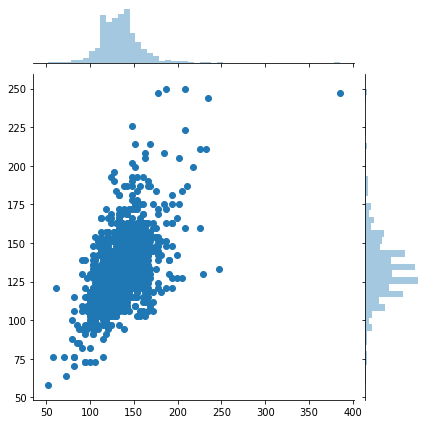

In [110]:
sns.jointplot(dim1,dim2)

In [112]:
# we have small images and very large images as well. so we take mean image to resize every image by 134x134x3


In [113]:
image_shape= (134,134,3)

In [114]:
#transformation of images to make model more robust

In [116]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [117]:
image_gen= ImageDataGenerator(rotation_range=20, 
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             rescale=1,
                             shear_range= 0.1,
                             zoom_range=0.1,
                             horizontal_flip=True,
                             fill_mode='nearest')

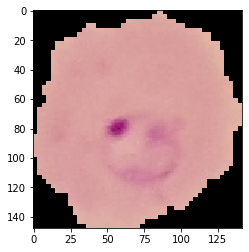

In [121]:
plt.imshow(imread(para_cell))

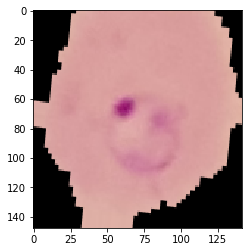

In [131]:
plt.imshow(image_gen.random_transform(imread(para_cell)))

In [132]:
# setting up the directory to flow from the directories

In [133]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [134]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [135]:
from tensorflow.keras.models import Sequential

In [136]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Flatten, Dropout

In [152]:
model=Sequential()


model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(134, 134, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(134, 134, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=(134, 134, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(128, activation= 'relu'))
model.add(Dropout(0.4))

model.add(Dense(64, activation= 'relu'))
model.add(Dropout(0.4))

model.add(Dense(1, activation= 'sigmoid'))

model.compile(loss= 'binary_crossentropy', optimizer = 'adam',
             metrics=['accuracy'])

In [153]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 132, 132, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 66, 66, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28800)            

In [154]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [155]:
batch_size=16

In [156]:
train_img_gen=image_gen.flow_from_directory(train_path, 
                                            target_size=(134,134), 
                                            color_mode='rgb', 
                                            batch_size=batch_size,
                                            class_mode='binary')
                                            
test_img_gen=image_gen.flow_from_directory(test_path, 
                                            target_size=(134,134), 
                                            color_mode='rgb', 
                                            batch_size=batch_size,
                                            class_mode='binary',
                                            shuffle=False)


Found 24958 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


In [157]:
train_img_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [158]:
results= model.fit_generator(train_img_gen, 
                             epochs=20, 
                             validation_data= test_img_gen,
                              callbacks=[early_stop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1560 steps, validate for 163 steps
Epoch 1/20
1560/1560 [==============================] - 615s 394ms/step - loss: 0.9248 - accuracy: 0.5206 - val_loss: 0.6855 - val_accuracy: 0.5727
Epoch 2/20
1560/1560 [==============================] - 388s 249ms/step - loss: 0.6881 - accuracy: 0.5506 - val_loss: 0.6833 - val_accuracy: 0.5685
Epoch 3/20
1560/1560 [==============================] - 385s 247ms/step - loss: 0.6930 - accuracy: 0.5565 - val_loss: 0.6800 - val_accuracy: 0.5808
Epoch 4/20
1560/1560 [==============================] - 392s 251ms/step - loss: 0.4706 - accuracy: 0.7549 - val_loss: 0.1924 - val_accuracy: 0.9388
Epoch 5/20
1560/1560 [==============================] - 388s 249ms/step - loss: 0.1960 - accuracy: 0.9405 - val_loss: 0.1675 - val_accuracy: 0.9454
Epoch 6/20
1560/1560 [==============================] - 388s 249ms/step - loss: 0.1841 - accuracy: 0.9464 - val_loss: 0.1761 - val_accuracy: 0.9435
Epoch 7/20
1560/1

In [160]:
losses = pd.DataFrame(model.history.history)

In [161]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.924823,0.520555,0.685538,0.572692
1,0.688065,0.550605,0.683288,0.568462
2,0.692956,0.556495,0.679967,0.580769
3,0.470598,0.754908,0.192430,0.938846
4,0.195930,0.940500,0.167515,0.945385
5,0.184139,0.946430,0.176135,0.943462
6,0.195368,0.942183,0.210882,0.939615


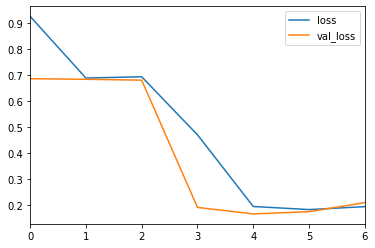

In [165]:
losses[['loss', 'val_loss']].plot()

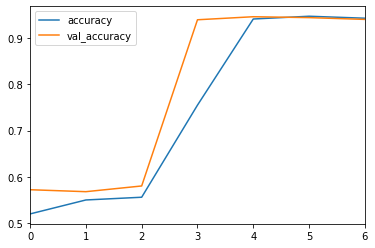

In [166]:
losses[['accuracy', 'val_accuracy']].plot()

In [168]:
model.evaluate_generator(test_img_gen)

Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']


[0.21755759228103755, 0.94076926]

In [170]:
predictions= model.predict_generator(test_img_gen)

In [171]:
prediction= predictions>0.5

In [172]:
prediction

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [173]:
len(prediction)

2600

In [174]:
from sklearn.metrics import classification_report,confusion_matrix

In [176]:
test_img_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [179]:
print(classification_report(test_img_gen.classes,prediction))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1300
           1       0.92      0.96      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



In [180]:
confusion_matrix(test_img_gen.classes,prediction)

array([[1197,  103],
       [  49, 1251]], dtype=int64)

In [181]:
#prediction

In [203]:
infect= test_path+ 'parasitized\\'+ 'C100P61ThinF_IMG_20150918_145609_cell_149.png'

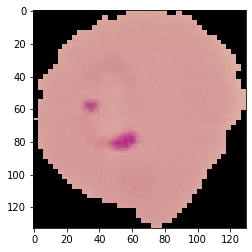

In [205]:
plt.imshow(imread(test_path+ 'parasitized\\'+ 'C100P61ThinF_IMG_20150918_145609_cell_149.png'))

In [206]:
from tensorflow.keras.preprocessing import image

In [211]:
new_image =image.load_img(infect, target_size= (134,134,3))

In [210]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 132, 132, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 66, 66, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28800)            

In [212]:
my_img_array= image.img_to_array(new_image)

In [213]:
my_img_array.shape

(134, 134, 3)

In [214]:
#expanding the dimensions of image

In [216]:
my_img_array= np.expand_dims(my_img_array,axis=0)

In [217]:
my_img_array.shape

(1, 134, 134, 3)

In [222]:
model.predict(my_img_array)>0.5

array([[False]])

In [ ]:
# the new image is predicted as infected